In [1]:
!pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as sim  
import pandas as pd 

from tqdm import tqdm

## Multi-armed bandit

In [3]:
k = 10 # number of arms
T = 1000 # number of time steps
M = 2000 # number of realizations
epsilon = 0.01 

rewards = np.zeros((T,M))

100%|██████████| 2000/2000 [05:58<00:00,  5.57it/s]


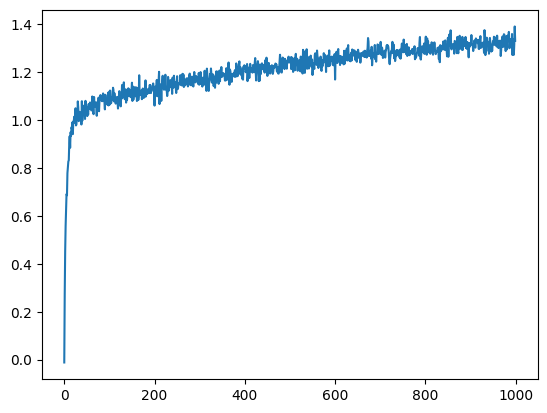

In [4]:

for realization in tqdm(range(M)):
        
    q_star = sim.randn(k) # true averages
    N = np.zeros(k) # counts the number of time an action is taken
    Q = np.zeros(k)
    
    for step in range(T):
        
        x = sim.uniform(0,1)
        
        # epsilon greedy strategy
        if x < epsilon:
            A = sim.randint(k)
        else:
            A = sim.choice([i for i in range(k) if (Q[i]==np.max(Q))])
            
        N[A] += 1
        
        reward = q_star[A] + sim.randn()
        rewards[step,realization] = reward
        
        Q[A] += 1/N[A]*(reward- Q[A])
        
            
plt.figure('average realizations')
plt.plot(np.mean(rewards, axis=1))

In [69]:
np.mean(rewards[-10:,:])

1.342525413110995

## Multi armed bandit: opitmize estimations by confidence intervals

In [ ]:
k = 10
T = 500
M = 200
epsilon = 0.01

c_ucb=2

rewards = np.zeros((T,M))

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\alexa\AppData\Local\Temp\ipykernel_19344\194442692.py:23: RuntimeWarning: divide by zero encountered in log
  A = np.argmax(Q + c_ucb*np.sqrt(np.log(step)/(1+N)))
C:\Users\alexa\AppData\Local\Temp\ipykernel_19344\194442692.py:23: RuntimeWarning: invalid value encountered in sqrt
  A = np.argmax(Q + c_ucb*np.sqrt(np.log(step)/(1+N)))
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 65.43it/s]


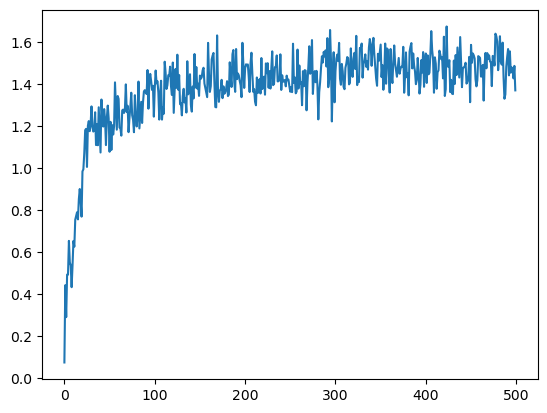

In [81]:
for realization in tqdm(range(M)):
      
    q_star = sim.randn(k)
    N = np.zeros(k)
    Q = np.zeros(k)
    
    for step in range(T):
        
        x = sim.uniform(0,1)
        
        if x < epsilon:
            A = sim.randint(k)
        else:
            A = np.argmax(Q + c_ucb*np.sqrt(np.log(step)/(1+N)))
            
        N[A] += 1
        
        reward = q_star[A] + sim.randn()
        rewards[step,realization] = reward
        
        Q[A] += 1/N[A]*(reward- Q[A])
        
            
plt.figure('average realizations')
plt.plot(np.mean(rewards, axis=1))

In [71]:
np.mean(rewards[-10:,:])

1.4690721691300155

In [77]:
T = 500
M = 200

test=0
for realization in tqdm(range(M)):
    for step in range(T):
        test+=1

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 5264.00it/s]
